In [1]:
# Load required libraries
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#Check working directory
os.getcwd()

'C:\\Users\\compu\\Choudhary Py\\Project'

In [3]:
# Set working directory
os.chdir("E:\project")

In [4]:
# Load the data
loan_data = pd.read_csv("bank-loan.csv")

In [5]:
# tells unique value count in each variable
for feature in loan_data.columns:
    print(feature ,':', loan_data[feature].nunique())

age : 37
ed : 5
employ : 33
address : 32
income : 129
debtinc : 245
creddebt : 842
othdebt : 848
default : 2


In [6]:
# Convert data to required data types
loan_data['ed'] = loan_data['ed'].astype('category')
loan_data['default'] = loan_data['default'].astype('category')

In [7]:
# Dividing the train and test data-set.
# here train set will be used to bulid and test the Model
# The Model will be used to predict the value of target column in the test set
train = pd.DataFrame(loan_data.loc[pd.notnull(loan_data['default'])])
test = pd.DataFrame(loan_data.loc[pd.isnull(loan_data['default'])])
# removing default variable from test
test = test.drop([test.columns[-1]], axis=1)

In [8]:
# Saving Numerical and categorical variables in different list
num_var = train.select_dtypes([np.number]).columns
cat_var = train.select_dtypes(['category']).columns

# Exploratory Data Analysis

In [9]:
# taking a look at the data
# gives first five rows of data set
train.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [10]:
test.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
700,36,1,16,13,32,10.9,0.544128,2.943872
701,50,1,6,27,21,12.9,1.316574,1.392426
702,40,1,9,9,33,17.0,4.880700,0.729300
703,31,1,5,7,23,2.0,0.046000,0.414000
704,29,1,4,0,24,7.8,0.866736,1.005264


In [11]:
# Getting the number of variables and obervation in the train data-set
train.shape

(700, 9)

In [12]:
#checking types
train.dtypes

age            int64
ed          category
employ         int64
address        int64
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
default     category
dtype: object

In [13]:
# Getting further info about the train data-set
# data type of data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
age         700 non-null int64
ed          700 non-null category
employ      700 non-null int64
address     700 non-null int64
income      700 non-null int64
debtinc     700 non-null float64
creddebt    700 non-null float64
othdebt     700 non-null float64
default     700 non-null category
dtypes: category(2), float64(3), int64(4)
memory usage: 45.4 KB


In [14]:
# getting summary of the train data-set
train.describe()

,age,employ,address,income,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209
std,7.997342,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555
min,20.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584
25%,29.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178
50%,34.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567
75%,40.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065
max,56.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600


In [15]:
# Getting the number of variables and obervation in the test data-set
test.shape

(150, 8)

In [16]:
#checking types
test.dtypes

age            int64
ed          category
employ         int64
address        int64
income         int64
debtinc      float64
creddebt     float64
othdebt      float64
dtype: object

In [17]:
# Getting the info about the test data-set
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 700 to 849
Data columns (total 8 columns):
age         150 non-null int64
ed          150 non-null category
employ      150 non-null int64
address     150 non-null int64
income      150 non-null int64
debtinc     150 non-null float64
creddebt    150 non-null float64
othdebt     150 non-null float64
dtypes: category(1), float64(3), int64(4)
memory usage: 9.7 KB


In [18]:
# getting summary of test data-set
test.describe()

,age,employ,address,income,debtinc,creddebt,othdebt
count,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,35.82000,9.393333,8.806667,51.686667,9.756667,1.685314,3.174833
std,8.22508,7.277710,7.221051,45.563310,6.196215,2.169602,3.886865
min,21.00000,0.000000,0.000000,13.000000,0.100000,0.022050,0.052950
25%,29.25000,4.000000,3.000000,25.250000,5.400000,0.533265,1.085211
50%,35.00000,8.000000,7.000000,39.000000,8.900000,1.013213,2.111303
75%,43.00000,13.750000,12.000000,61.750000,12.900000,1.898235,3.850151
max,56.00000,33.000000,30.000000,324.000000,32.500000,13.552500,35.197500


In [19]:
# Unique values in a column
train[train.columns[-1]].unique()

[1.0, 0.0]
Categories (2, float64): [1.0, 0.0]

In [20]:
# Count of unique values in a column
train[train.columns[-1]].nunique()

2

In [21]:
train[train.columns[-1]].value_counts()
# we have 517 '0' values and 183 '1' values
# we can see that the data is unbalanced

0.0    517
1.0    183
Name: default, dtype: int64

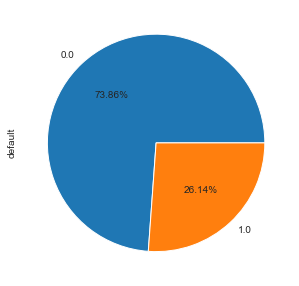

In [22]:
# setting grid for all charts
sns.set_style('darkgrid')
# visualizing target variable
plt.figure(figsize=(5,5))
train[train.columns[-1]].value_counts().plot.pie(autopct='%1.2f%%')

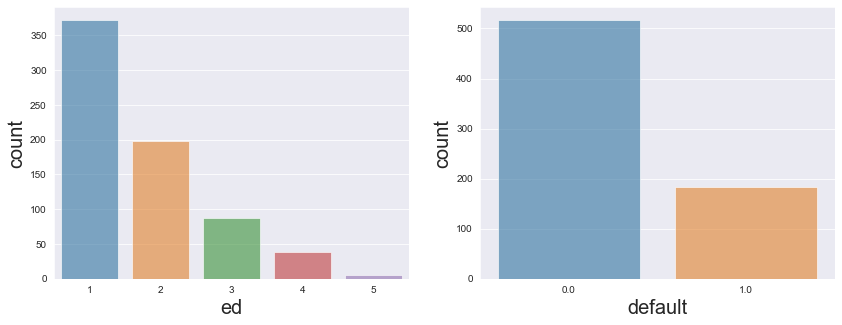

In [23]:
# categorical variable of train data set
plt.figure(figsize=(14,5))
for i,col in enumerate(cat_var):
    plt.subplot(1,2,i+1)
    sns.countplot(train[col], alpha=0.6)  
    plt.xlabel(col,fontsize=20)
    plt.ylabel('count',fontsize=20)

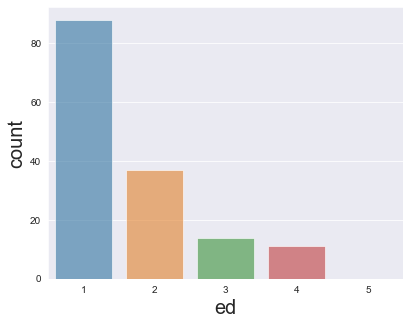

In [24]:
# categorical variable of test data set
plt.figure(figsize=(14,5))
for i,col in enumerate(cat_var[0:-1]):
    plt.subplot(1,2,i+1)
    sns.countplot(test[col], alpha=0.6)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('count',fontsize=20)

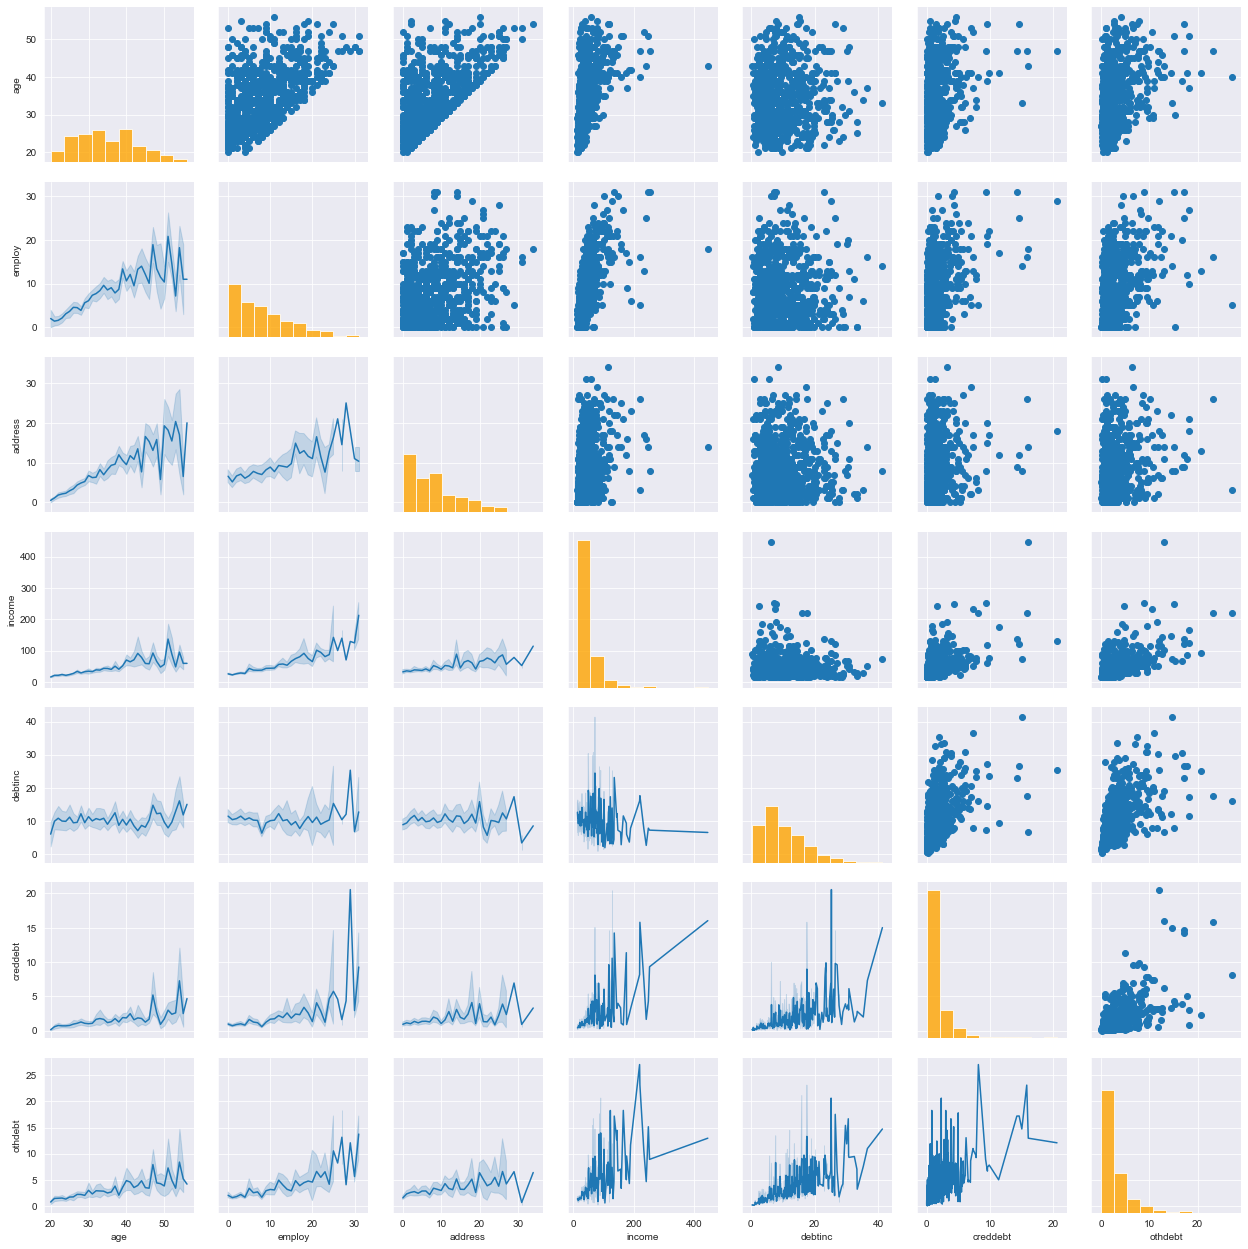

In [25]:
# Scatter plot
g = sns.PairGrid(train[train.select_dtypes([np.number]).columns])
g.map_diag(plt.hist, color='orange', alpha=0.8)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)

Distribution of Train features


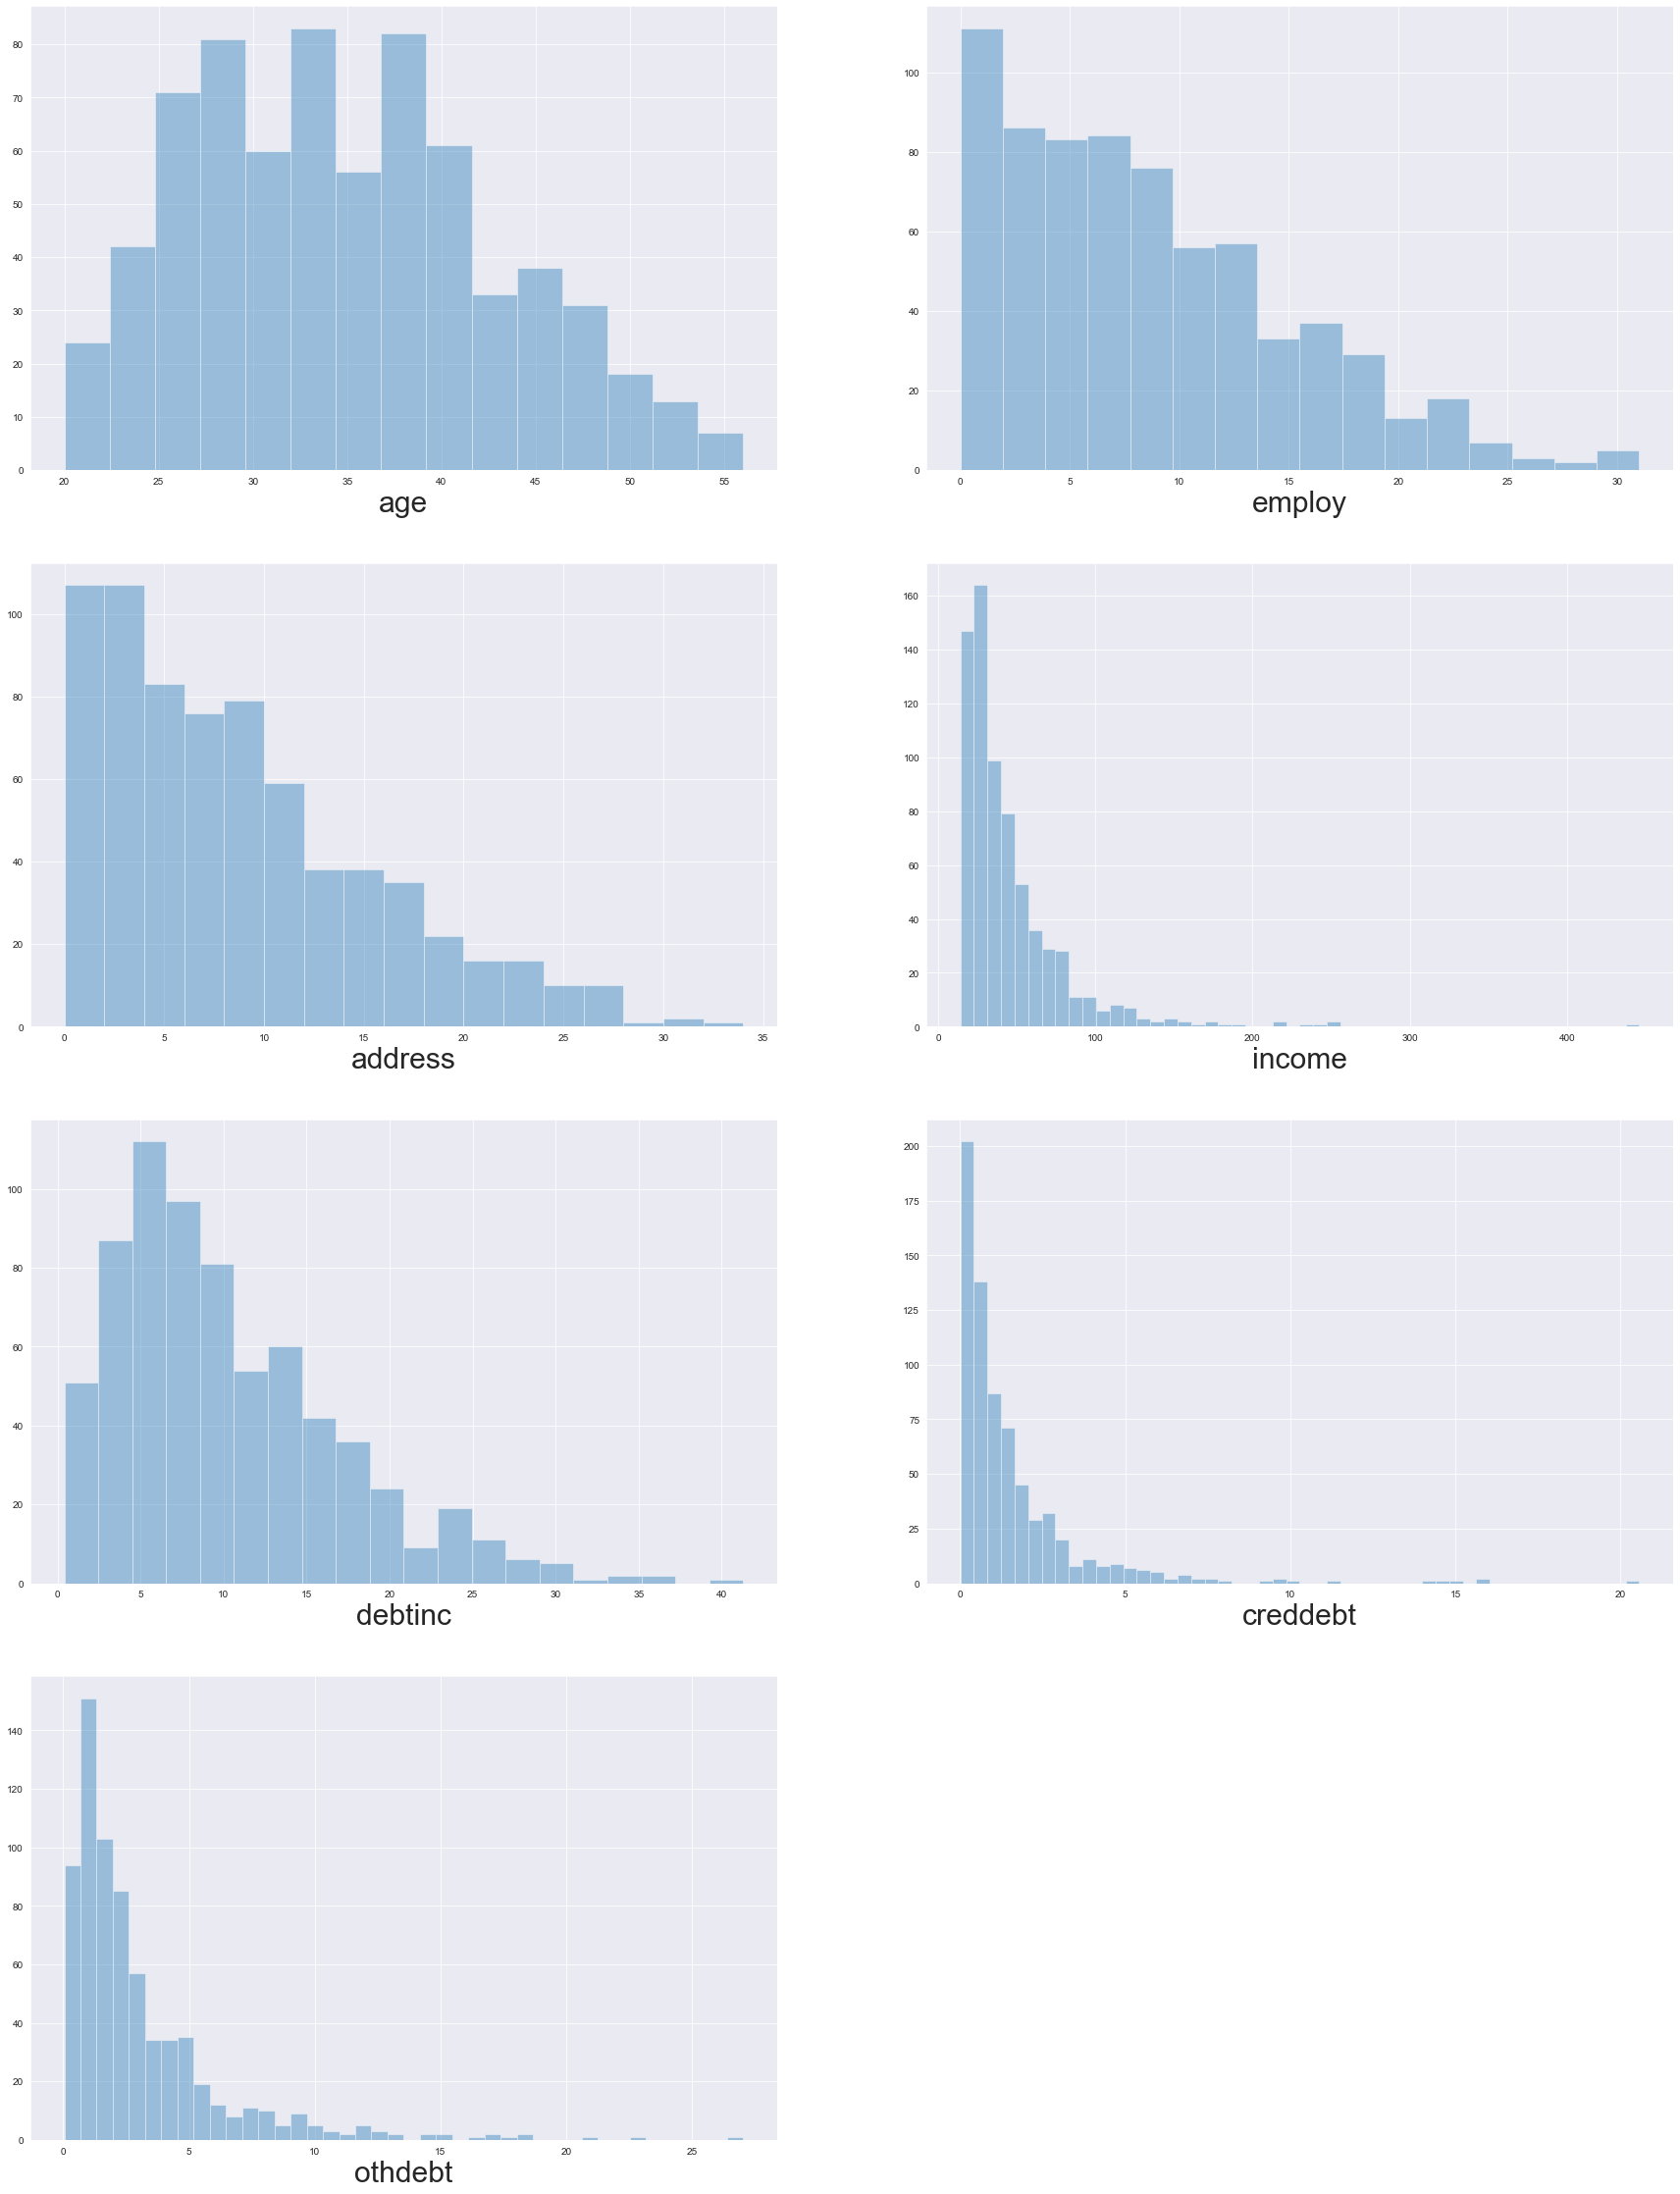

In [26]:
# draw histograms of numeric data in training set 
print("Distribution of Train features")
plt.figure(figsize=(30,40))
for i,col in enumerate(num_var):
    plt.subplot(4,2,i+1)
    #plt.hist(train[col], bins='auto')
    sns.distplot(train[col], kde=False)
    plt.xlabel(col,fontsize=30)

Distribution of Test features


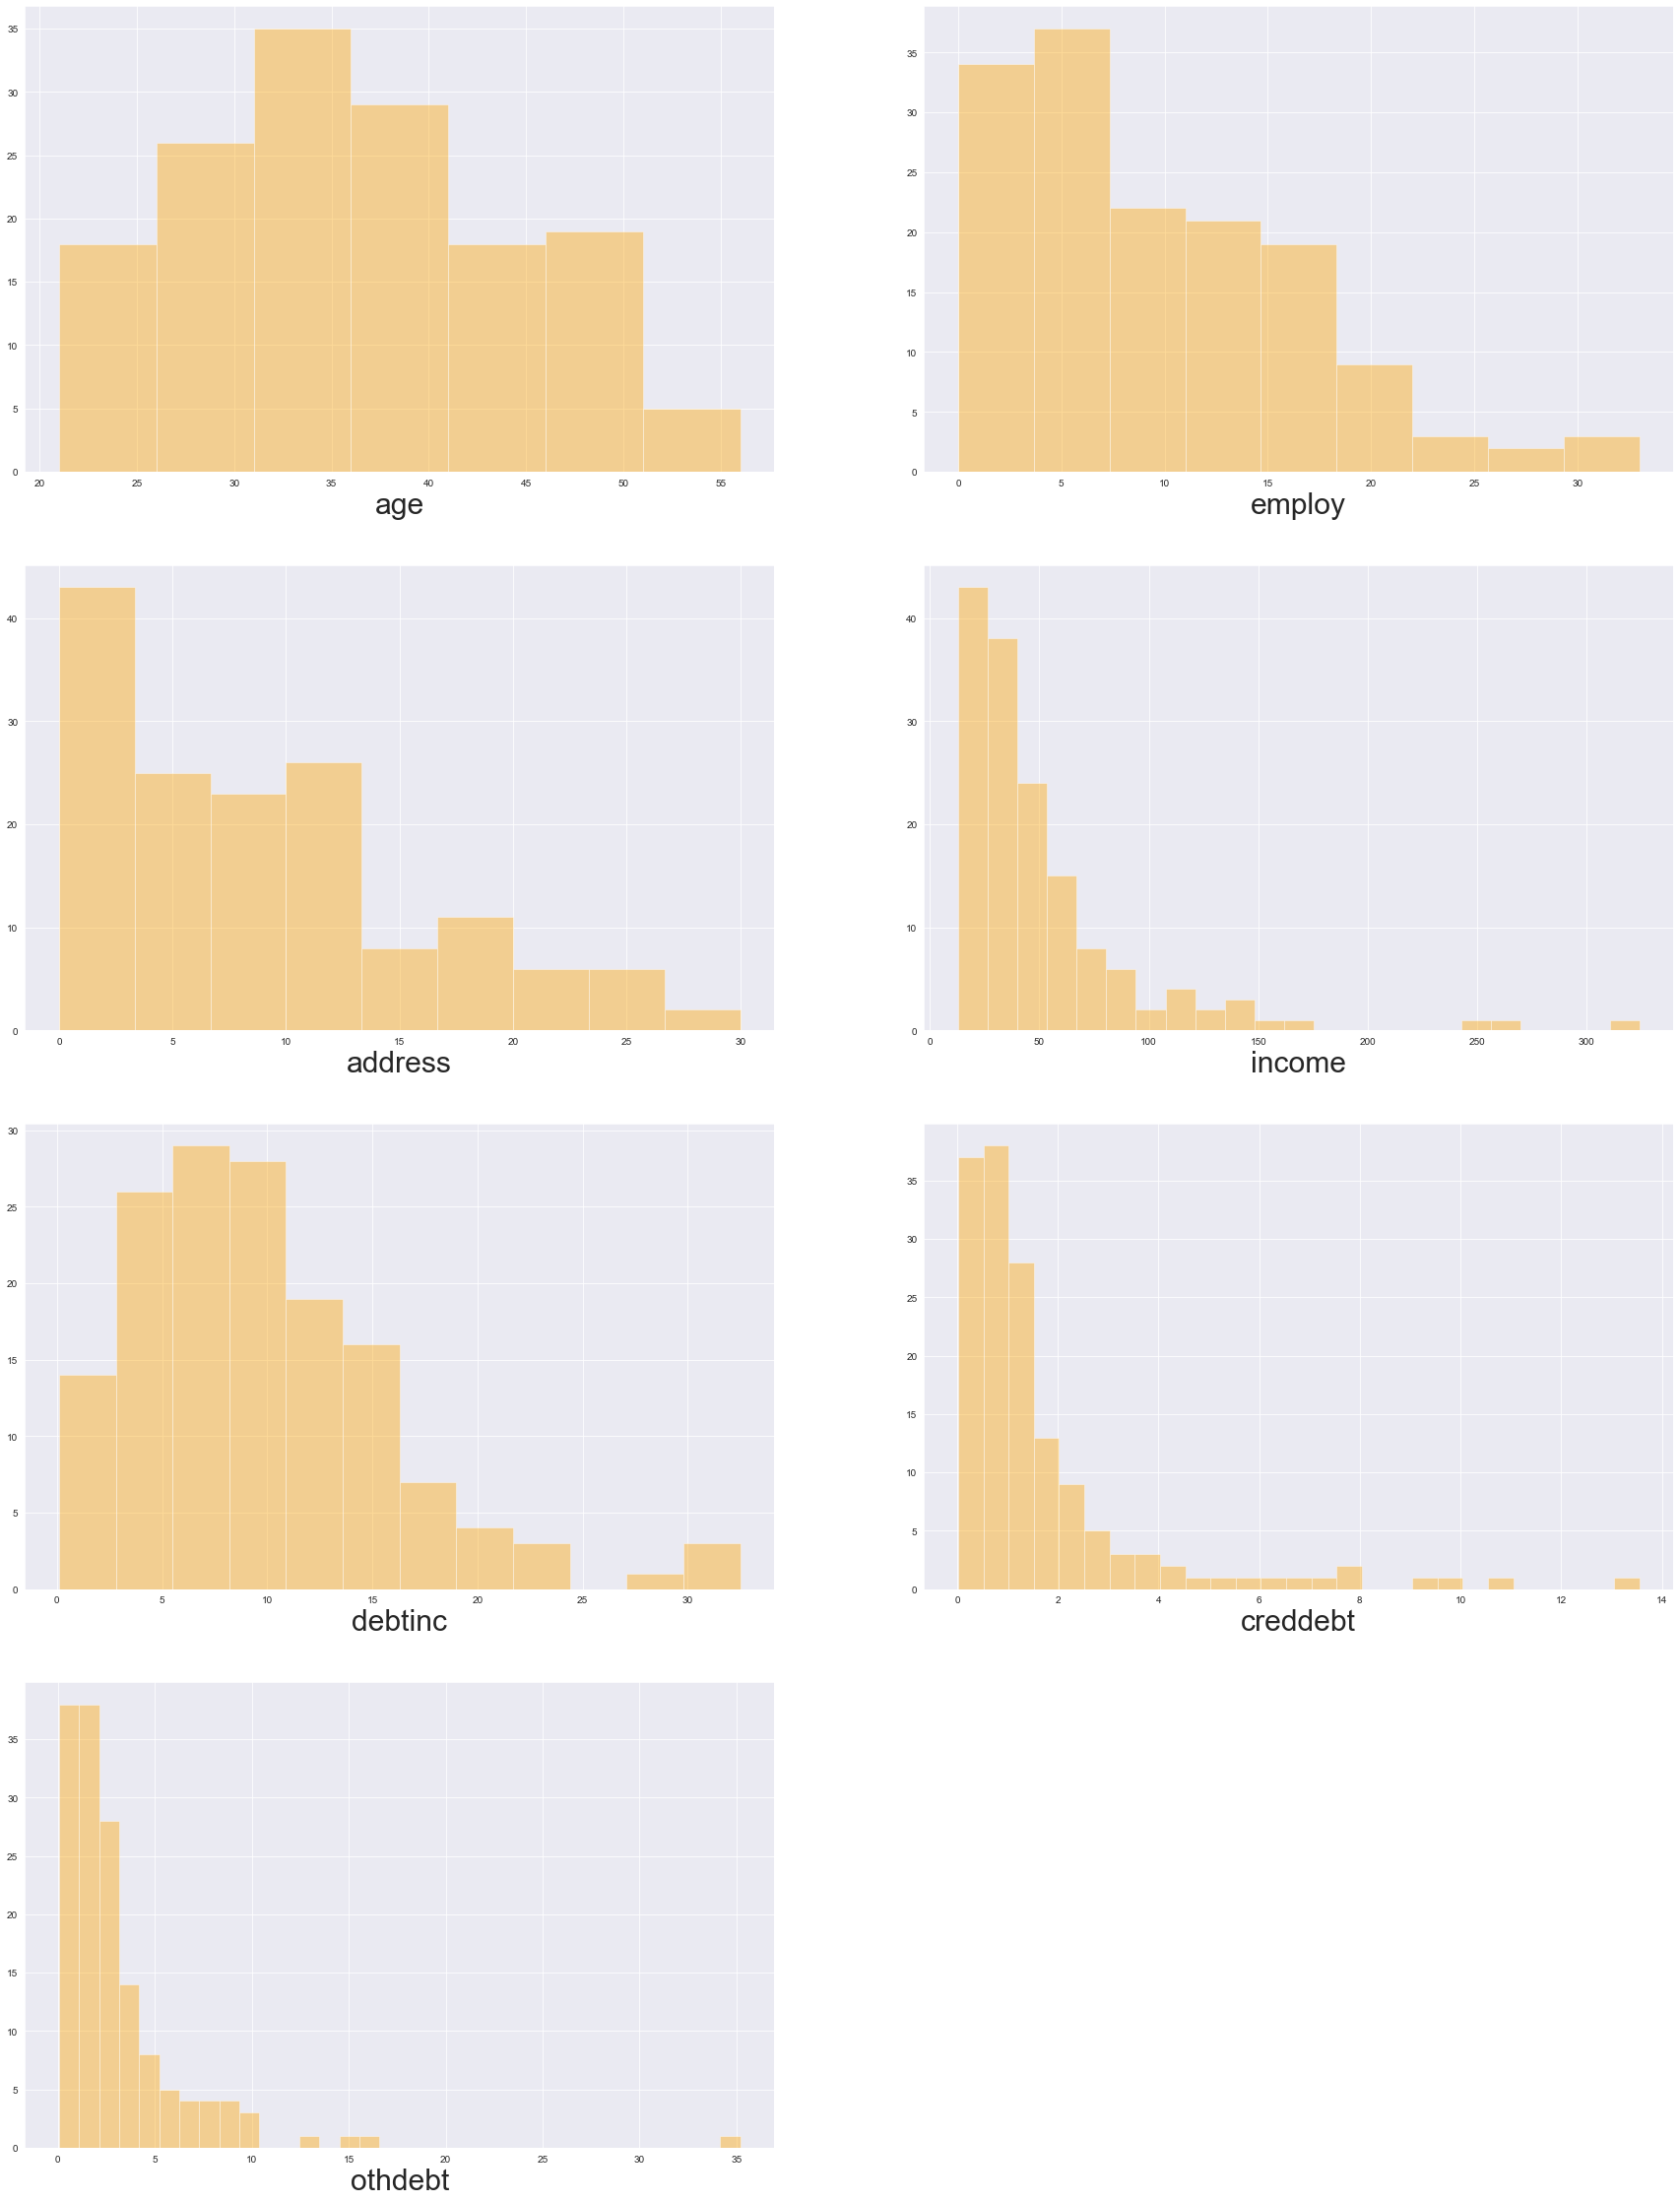

In [27]:
# draw histograms of numeric data in Test set 
print("Distribution of Test features")
plt.figure(figsize=(30,40))
for i,col in enumerate(num_var):
    plt.subplot(4,2,i+1)
    #plt.hist(train[col], bins='auto', color='orange')
    sns.distplot(test[col], kde=False, color='orange')
    plt.xlabel(col,fontsize=30)

Distribution of features per target class


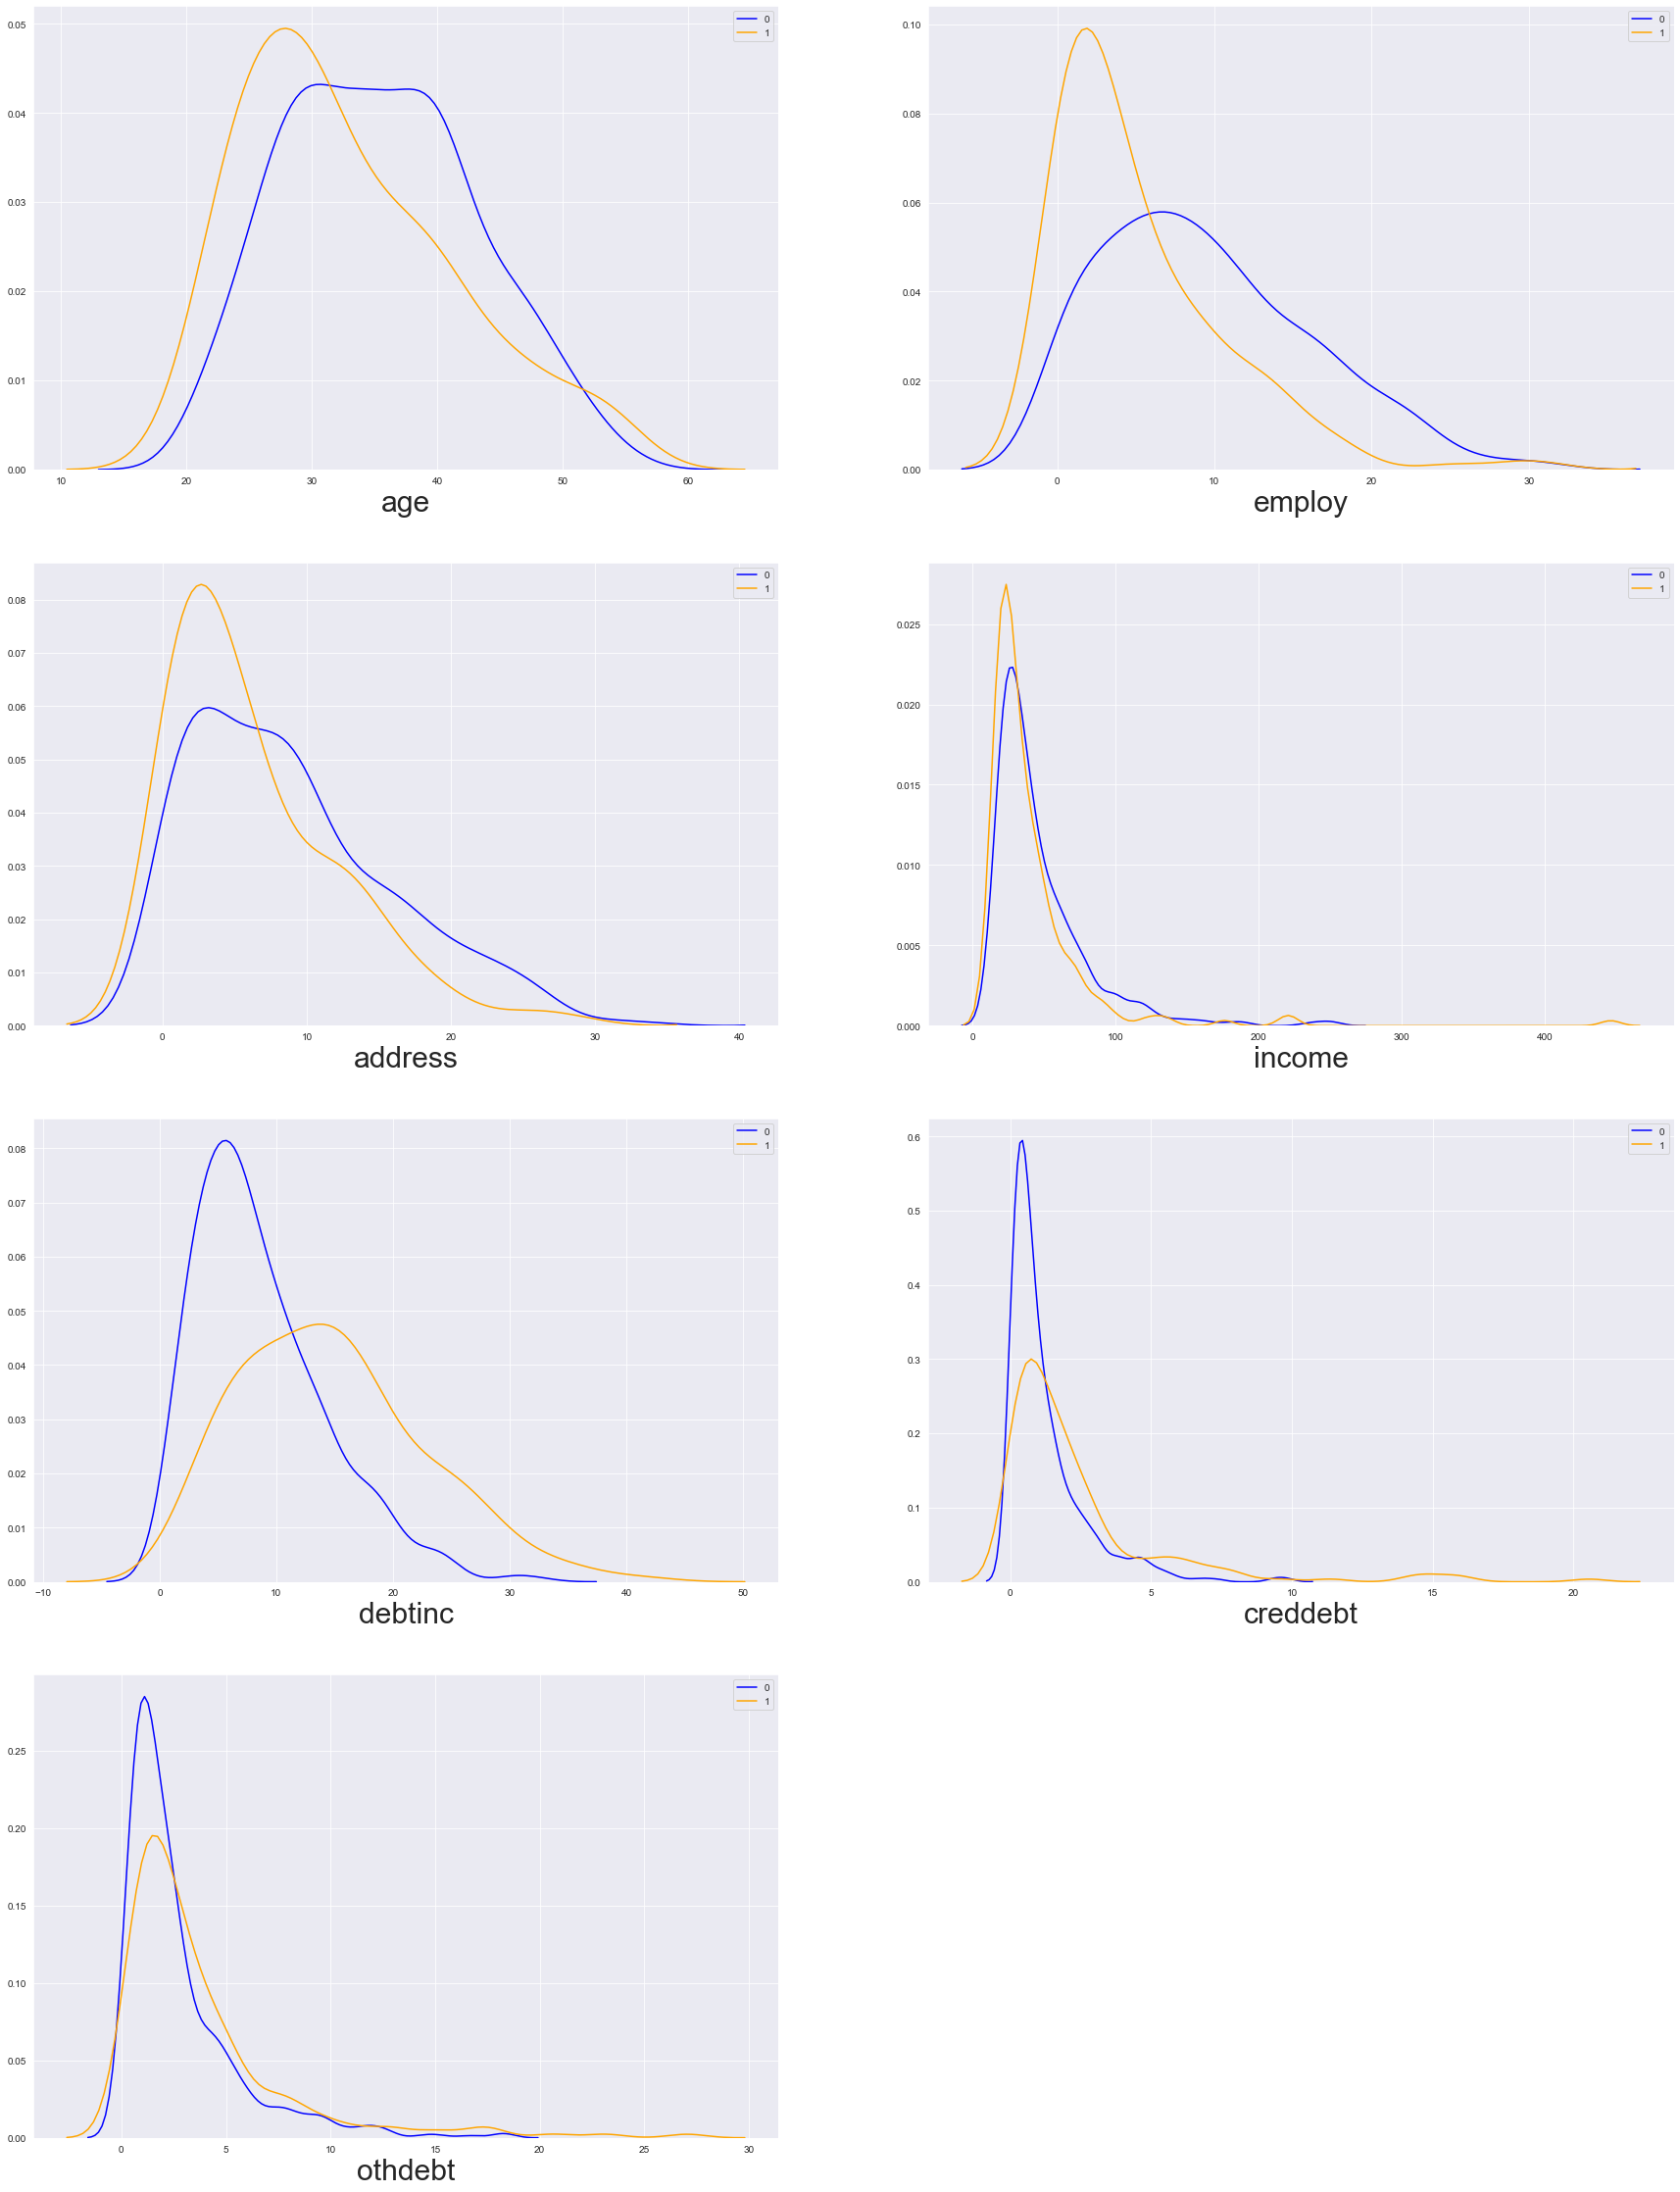

In [28]:
# Distribution of features per target class
# Kerner Density Estimate (KDE)
print("Distribution of features per target class")
plt.figure(figsize=(30,40))
for i,col in enumerate(num_var):
    plt.subplot(4,2,i+1)
    sns.distplot(train[train[train.columns[-1]]==0][col],hist=False,label='0',color='blue')
    sns.distplot(train[train[train.columns[-1]]==1][col],hist=False,label='1',color='orange')
    plt.xlabel(col,fontsize=30)

Distribution of features for test and train dataset


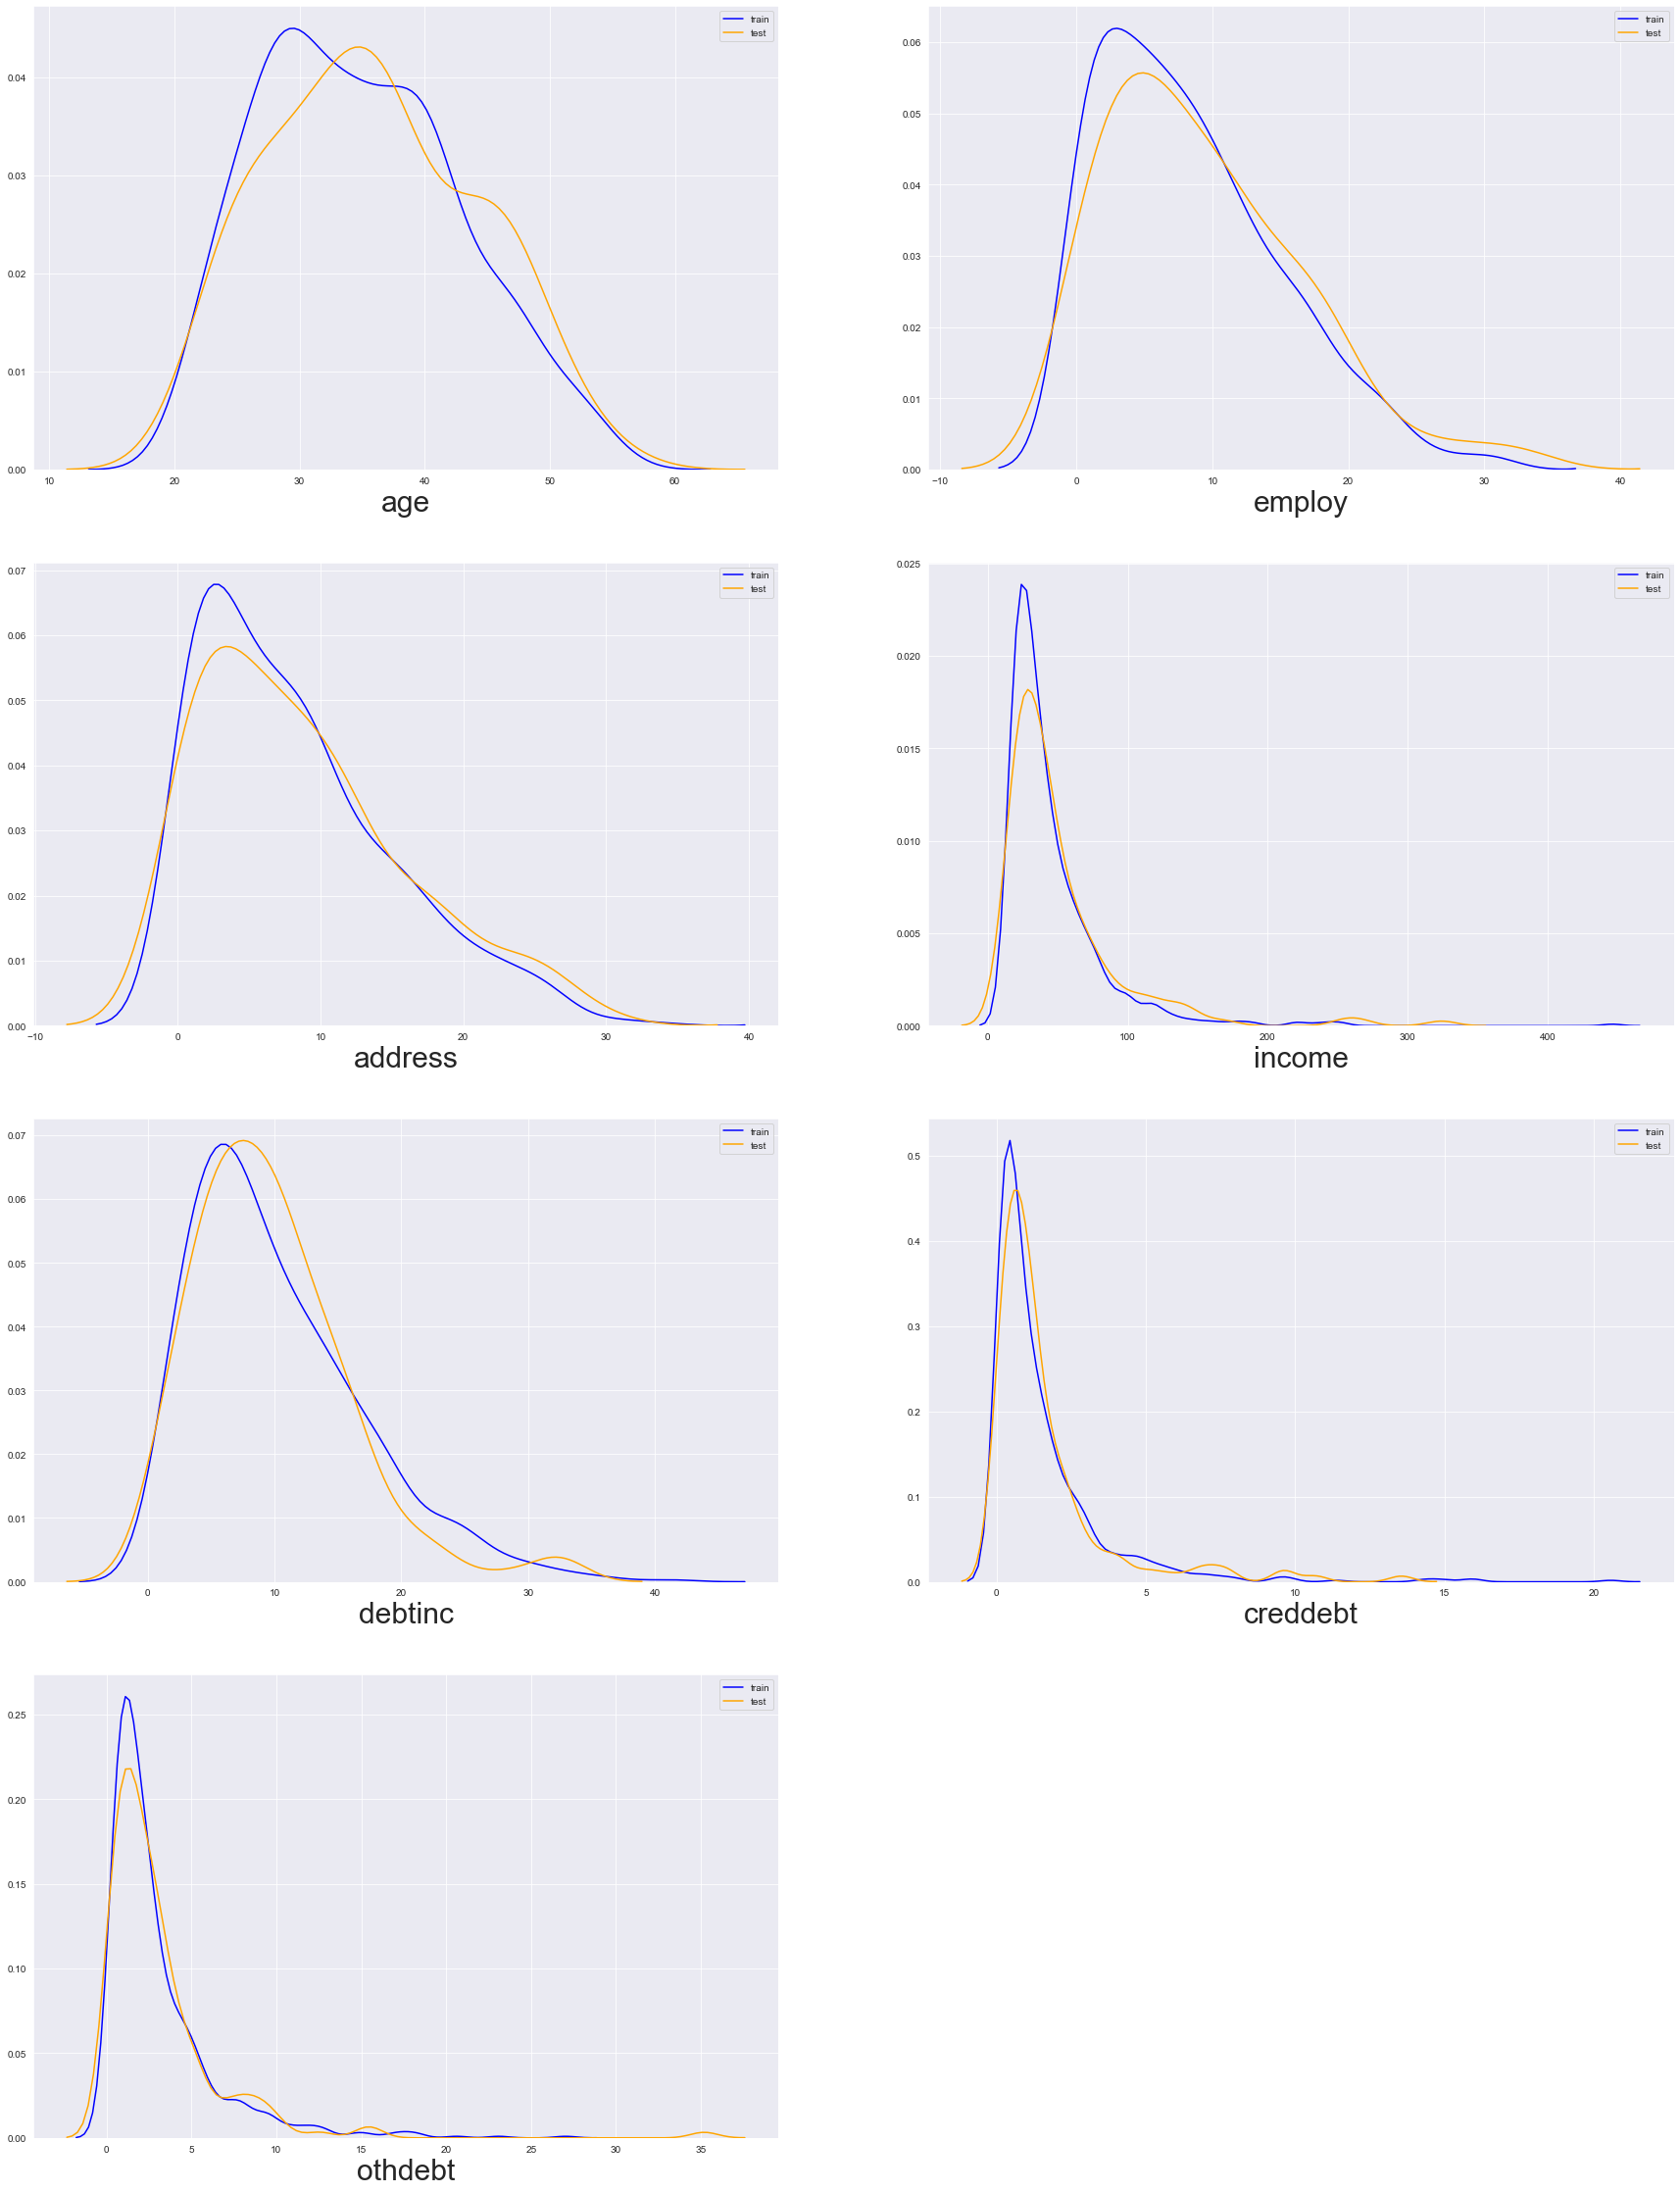

In [29]:
# Distribution of features for test and train dataset
print("Distribution of features for test and train dataset")
plt.figure(figsize=(30,40))
for i,col in enumerate(num_var):
    plt.subplot(4,2,i+1)
    sns.distplot(train[col],hist=False,label='train',color='blue')
    sns.distplot(test[col],hist=False,label='test',color='orange')
    plt.xlabel(col,fontsize=30)

Boxplot of Train features


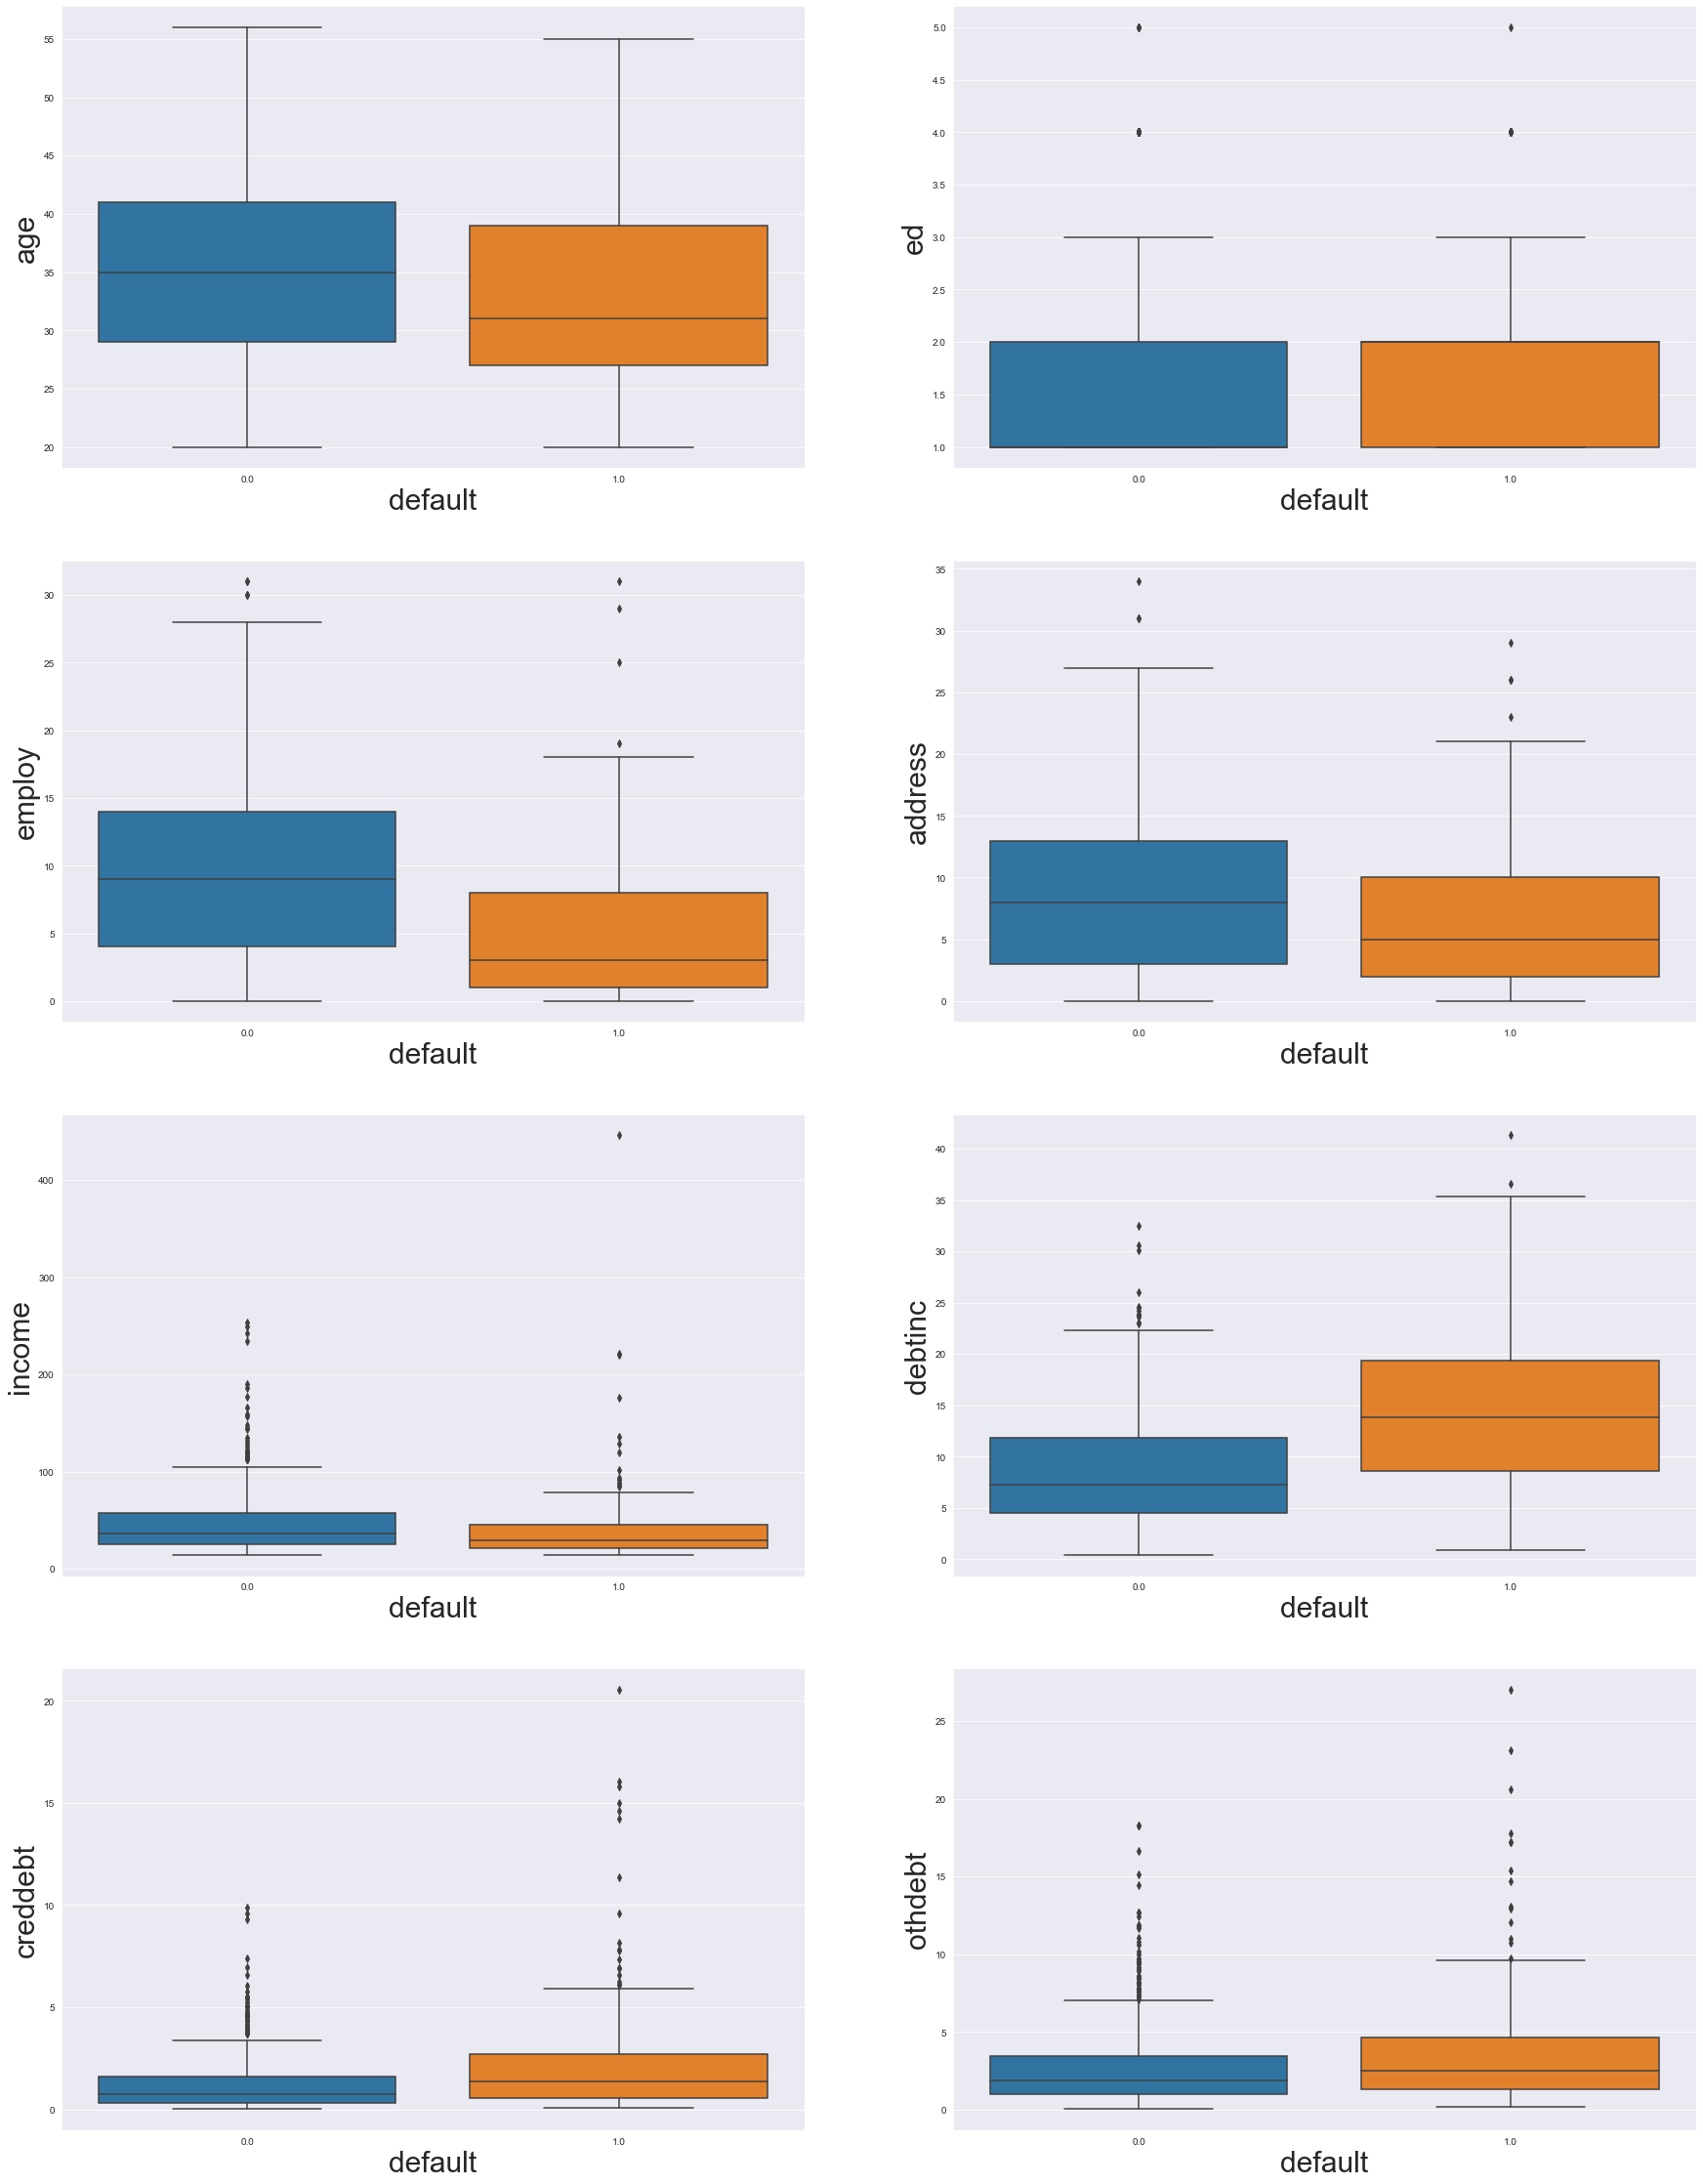

In [30]:
# draw boxplot of numeric data in Train set 
print("Boxplot of Train features")
plt.figure(figsize=(30,40))
for i,col in enumerate(train.columns.values[0:-1]):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=train.columns[-1], y=col, data=train, orient='v')
    plt.xlabel(train.columns[-1],fontsize=30)
    plt.ylabel(col,fontsize=30)
# from plots we can clearly see that there are outliers in our dataset

# Missing Value Analysis

In [31]:
# getting count of missing values in train
train.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [32]:
# getting count of missing values in test
test.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
dtype: int64

# Outlier Analysis

In [33]:
# # handling outliers in Train data-set
# Q1 = train.quantile(0.25)
# Q3 = train.quantile(0.75)
# IQR = Q3 - Q1

# for feature in num_var:
#     train.loc[(train[feature] < (Q1[feature] - 1.5 * IQR[feature])) | 
#               (train[feature] > (Q3[feature] + 1.5 * IQR[feature])),feature] = np.nan
    
#     #Impute with mean
#     #train[column_name] = train[column_name].fillna(train[column_name].mean())

#     #Impute with median
#     train[feature] = train[feature].fillna(train[feature].median())

In [34]:
# # handling outliers in Test data-set
# Q1 = test.quantile(0.25)
# Q3 = test.quantile(0.75)
# IQR = Q3 - Q1

# for feature in num_var:
#     test.loc[(test[feature] < (Q1[feature] - 1.5 * IQR[feature])) | 
#               (test[feature] > (Q3[feature] + 1.5 * IQR[feature])),feature] = np.nan
    
#     #Impute with mean
#     #test[feature] = test[feature].fillna(test[feature].mean())

#     #Impute with median
#     test[feature] = test[feature].fillna(test[feature].median())

# Feature Selection

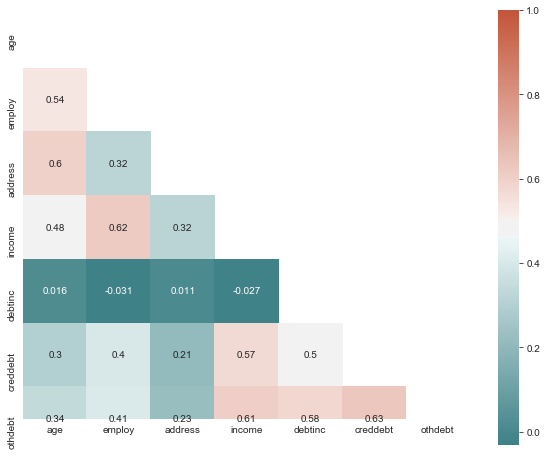

In [35]:
# Correlation plot
corr = train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(200, 20, as_cmap=True), square=True, annot=True)

In [36]:
np.fill_diagonal(corr.values,np.nan)
corr.max().max(),corr.min().min()

(0.6331036101558932, -0.03118221466537934)

In [37]:
# Chisquare test of independence
from scipy.stats import chi2_contingency
# loop for chi square values
for i in cat_var:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train[cat_var[-1]], train[i]))
    print(p)
# replace variables whose p-value is more than 0.05

ed
0.02155395852574417
default
3.979757656840162e-153


In [38]:
# creating dummyvariables for categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
train = pd.DataFrame(ct.fit_transform(train))
test = pd.DataFrame(ct.fit_transform(test))

In [39]:
test.insert(4, 'col', 0)
test.columns = range(test.shape[1])

In [40]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,1,0,0,41,17,12,176,9.3,11.3594,5.00861,1
1,1,0,0,0,0,27,10,6,31,17.3,1.3622,4.0008,0
2,1,0,0,0,0,40,15,14,55,5.5,0.856075,2.16893,0
3,1,0,0,0,0,41,15,14,120,2.9,2.65872,0.82128,0
4,0,1,0,0,0,24,2,0,28,17.3,1.78744,3.05656,1


In [41]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0,36.0,16.0,13.0,32.0,10.9,0.544128,2.943872
1,1.0,0.0,0.0,0.0,0,50.0,6.0,27.0,21.0,12.9,1.316574,1.392426
2,1.0,0.0,0.0,0.0,0,40.0,9.0,9.0,33.0,17.0,4.880700,0.729300
3,1.0,0.0,0.0,0.0,0,31.0,5.0,7.0,23.0,2.0,0.046000,0.414000
4,1.0,0.0,0.0,0.0,0,29.0,4.0,0.0,24.0,7.8,0.866736,1.005264


In [42]:
train = train.astype(np.integer)
test = test.astype(np.integer)

# Sampling

In [43]:
# saving dependent and independent variable in different array for model training
X = train.iloc[:, 0:-1].values
y = train.iloc[:, -1].values
test_result = test.iloc[:, 0:].values

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Scaling

In [45]:
# another method of scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_result = sc.transform(test_result)

# Model Development

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

def classification_model(model):
    
    select_model = model
    
    if select_model=='logistic':
        # Fitting Logistic Regression to the Training set
        classifier = LogisticRegression(random_state = 42).fit(X_train, y_train)
        
    elif select_model=='KNN':
        # Fitting K-NN to the Training set
        classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2).fit(X_train, y_train)
    
    elif select_model=='NB':
        # Fitting Naive Bayes to the Training set
        classifier = GaussianNB().fit(X_train, y_train)
        
    elif select_model=='DT':
        # Fitting Decision Tree Classification to the Training set    
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42).fit(X_train, y_train)
        
    elif select_model=='RF':
        # Fitting Random Forest Classification to the Training set
        classifier = RandomForestClassifier(n_estimators = 625,
                                               criterion = 'entropy', random_state = 42).fit(X_train, y_train)
    elif select_model=='SVC':    
        # Fitting SVM to the Training set
        classifier = SVC(kernel = 'rbf',C = 0.75, gamma = 0.2, random_state = 42).fit(X_train, y_train)
        
    else:
        classifier = 'Incorrect Input'
        
    return classifier

In [47]:
# Choose classifier

model_selected = 'logistic'
#model_selected = 'KNN'
#model_selected = 'NB'
#model_selected = 'DT'
#model_selected = 'RF'
#model_selected = 'SVC'

classifier = classification_model(model_selected)
print(classifier)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[[97  5]
 [16 22]]
Accuracy is: 0.8500
FNR is: 42.105
Precision is: 0.8148
Recall is: 0.5789
F1 Score is: 0.6769


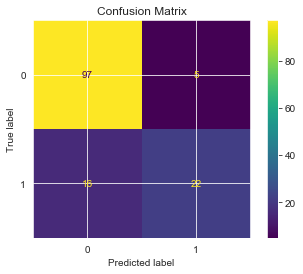

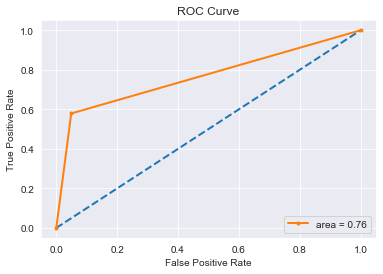

Text(0.5, 1.0, 'Precision-Recall curve')

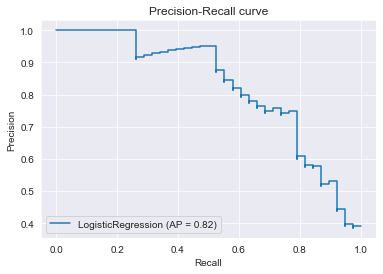

In [48]:
# libraries to make pr and roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# let us save TP, TN, FP, FN
TN = cm[0,0]
FN = cm[1,0]
TP = cm[1,1]
FP = cm[0,1]

accuracy = accuracy_score(y_test, y_pred)
FNR = (FN*100)/(FN+TP)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

print(cm)
print('Accuracy is: %0.4f' %accuracy)
print('FNR is: %0.3f' %FNR)
print('Precision is: %0.4f' %precision)
print('Recall is: %0.4f' %recall)
print('F1 Score is: %0.4f' %f1_score)

# plot Confusion Matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Receiver Operating Characteristic
# plot model roc curve 
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.plot(fpr, tpr, marker='.', lw=2, label='area = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Precision-Recall Curve
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

# K-Fold Cross Validation

In [49]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.29 %
Standard Deviation: 3.21 %


# Predicting Test data-set and saving output file

In [50]:
test_pred = classifier.predict(test_result)

test['default'] = test_pred
# Writing a csv (output)
#test_output.to_csv("test_output_python.csv", index = False)

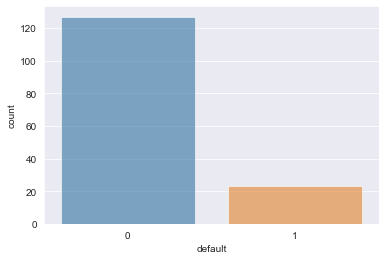

In [51]:
# visualizing output target variable
sns.countplot(test[test.columns[-1]], alpha=0.6)

In [52]:
test[test.columns[-1]].value_counts()

0    127
1     23
Name: default, dtype: int64

In [53]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,default
0,1,0,0,0,0,36,16,13,32,10,0,2,0
1,1,0,0,0,0,50,6,27,21,12,1,1,0
2,1,0,0,0,0,40,9,9,33,17,4,0,1
3,1,0,0,0,0,31,5,7,23,2,0,0,0
4,1,0,0,0,0,29,4,0,24,7,0,1,0
